In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

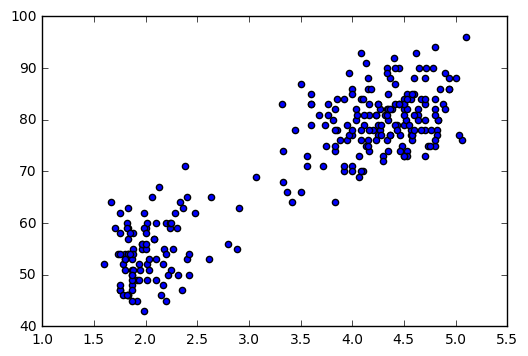

In [55]:
f = np.loadtxt("faithful.dat.txt")
data = np.delete(f, 0, 1)
plt.scatter(data[:,0], data[:,1])

## Expectaction Maximization(EM) Algorithms

In [230]:
class ExpectationMaximization:
    def __init__(self, data, k=2):
        # make initial guess about the parameters
        self.max_iteration = 100
        self.data = data
        self.k = k
        m, n = self.data.shape
        self.mu = np.mat(np.zeros((k,n)))
        self.pi = [1.0/k]*k
        for i in range(n):
            minE = min(data[:,i])
            maxE = max(data[:,i])
            self.mu[:,i] = minE + (maxE - minE) * np.random.rand(k,1)
        self.mu = np.array(self.mu)
        initial_cov = np.dot(data.T, data)
        self.cov = np.array([initial_cov] * k)
            
    def iterate(self):
        m, n = self.data.shape
        yi = np.zeros((m,self.k))
        cnt = 0
        for _ in range(self.max_iteration):
            cnt += 1
            prev_yi = np.copy(yi)
            # E-step
            for i in range(m):
                denominator = 0
                for j in range(self.k):
                    denominator += self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])
                for j in range(self.k):
                    yi[i,j] = (self.pi[j] * multivariate_normal.pdf(data[i,:], mean=self.mu[j,:], cov=self.cov[j])) / denominator
            # M-step
            for j in range(self.k):
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += (1-yi[i,j]) * data[i,:]
                    denominator += 1-yi[i,j]
                self.mu[j] = numerator / denominator
                numerator = 0
                denominator = 0
                for i in range(m):
                    numerator += (1-yi[i,j]) * (data[i,:]-self.mu[j])**2
                    denominator += 1-yi[i,j]
                self.cov[j] = numerator / denominator
                self.pi[j] = (np.sum(yi[:,j])) / m
            print self.mu
        return cnt

In [ ]:
em = ExpectationMaximization(data)
print em.iterate()